# **UNSUPERVISED LEARNING**

**AI05123 - VIRGIE YUNITA SALSABIL**

# Preparation

Peparation biasa dilakukan untuk mempersiapkan data sebelum masuk dalam tahap pemodelan. <br>
Berikut adalah tahapan yang akan dilalui pada data `Cluster S1.csv` (sebuah data yang di-generate secara random) sebelum tahap pemodelan :
1. Import Library
2. Read Dataset
3. Pencarian Model CLuster Terbaik
4. Proses Clustering

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import cluster
from sklearn.metrics import silhouette_score

In [ ]:
#Proses pembacaan data dari Sumber
data = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/cluster_s1.csv')
data.head()

,no,x,y
0,NaN,664159,550946
1,NaN,665845,557965
2,NaN,597173,575538
3,NaN,618600,551446
4,NaN,635690,608046


In [ ]:
#drop data yang tidak diperlukan perlu
data = data.drop('no', axis = 1)
data.head()

,x,y
0,664159,550946
1,665845,557965
2,597173,575538
3,618600,551446
4,635690,608046


In [ ]:
# Informasi dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x       5000 non-null   int64
 1   y       5000 non-null   int64
dtypes: int64(2)
memory usage: 78.2 KB


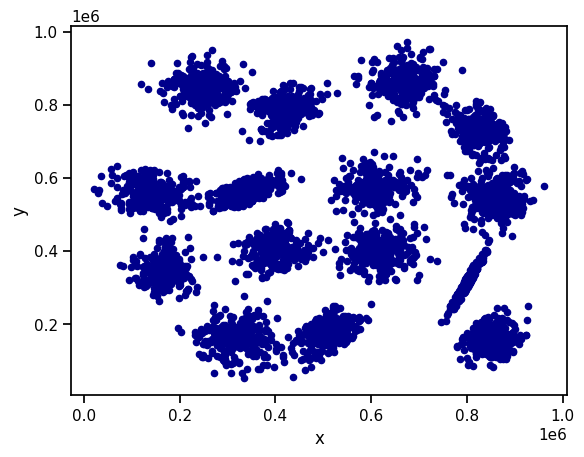

In [ ]:
#Lakukan Visualisasi
#Kita plot biar datanya terlihat

%matplotlib inline
ax1 = data.plot.scatter(x='x',y='y',c='DarkBlue')

### Lakukan segmentasi data dengan metode Clustering, metode yang digunakan bebas. Hasil akhir akan dievaluasi menggunakan fungsi silhouette score seperti contoh di bawah ini

Jumlah Cluster Terbaik: 15


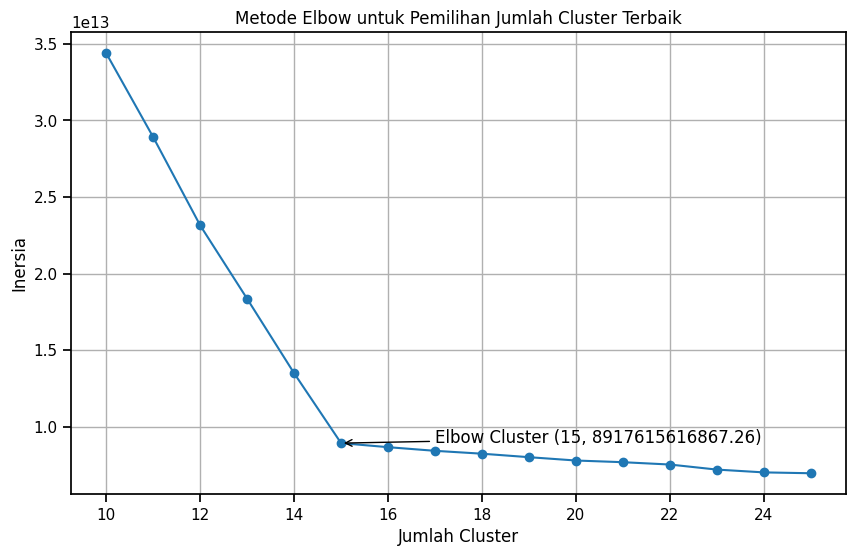

In [ ]:
#Lakukan Proses Pencarian CLuster terbaik untuk data diatas

#START CODE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from warnings import filterwarnings as fw; fw('ignore')

# Inisialisasi list untuk menyimpan nilai inersia
inertia_values = []

# Mencoba jumlah cluster yg akan diuji dari 10 hingga 26
for num_clusters in range(10, 26):
    # Inisialisasi model K-Means
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)

    # Melakukan clustering
    kmeans.fit(data)

    # Menyimpan nilai inersia
    inertia_values.append(kmeans.inertia_)

# Plotting nilai inersia untuk setiap jumlah cluster
plt.figure(figsize=(10, 6))
plt.plot(range(10, 26), inertia_values, marker='o', linestyle='-')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inersia')
plt.title('Metode Elbow untuk Pemilihan Jumlah Cluster Terbaik')

# Menambahkan label nilai inersia pada siku "elbow" (jmlh cluster optimal = 15)
elbow_cluster = 15
plt.annotate(f'Elbow Cluster ({elbow_cluster}, {inertia_values[elbow_cluster-10]:.2f})',
             xy=(elbow_cluster, inertia_values[elbow_cluster-10]),
             xytext=(elbow_cluster + 2, inertia_values[elbow_cluster-10] + 10000),
             arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.grid(True)

# Menentukan jumlah cluster terbaik berdasarkan analisis grafik
best_cluster = 15  # Jumlah cluster terbaik setelah dilakukan percobaan pada beberapa cluster
print(f"Jumlah Cluster Terbaik: {best_cluster}")

plt.show()
#END CODE

**PENJELASAN**

- Dari kurva inersia di atas, perhatikan pada titik mana penurunan inersia mulai melambat secara signifikan & membentuk siku/elbow, maka jumlah cluster tersebut dianggap sebagai cluster optimal/terbaik.

- Pada gambar di atas jumlah cluster optimalnya adalah 15 cluster.

In [ ]:
# Nilai Inersia pada cluster yg diuji (dari 10 hingga 26)
inertia_values

[34391481278674.81,
 28911073060127.125,
 23146756787307.777,
 18350029727191.914,
 13486733767168.459,
 8917615616867.258,
 8654195380138.777,
 8415631292726.098,
 8227282809930.557,
 8000004005435.432,
 7782061513020.172,
 7672183139126.995,
 7519773294441.791,
 7189455085478.642,
 7006296067332.918,
 6950032397189.744]

In [ ]:
#Lengkapi Code di bawah ini sehingga menghasilkan evaluasi jumlah cluster terbaik
#Contoh pemanggilan Library CLustering
from sklearn.cluster import KMeans

#START CODE

# Jumlah Cluster terbaik setelah dilakukan percobaan pd bbrp cluster
best_cluster = 15

kmeans = cluster.KMeans(n_clusters=best_cluster , random_state=0)
kmeans.fit(data)
label = kmeans.labels_
#END CODE

score = silhouette_score(data, label)
print("silhouette score = ",score)

silhouette score =  0.711278614093076


- Skor Silhouette digunakan utk mengukur sejauh mana setiap sampel dalam cluster dekat dg sampel lain dlm cluster yang sama dibandingkan dengan cluster lain.

## Proses Visualisasi hasil CLuster

In [ ]:
#Proses Visualisasi hasil cluster

#Pertama, masukkan dahulu label hasil clustering ke dalam data

# Masukan label hasil clustering ke dlm data
result = data.copy()

#START CODE
result['cluster'] = label

# Tampilkan data dg label cluster
result.head()
#END CODE

,x,y,cluster
0,664159,550946,10
1,665845,557965,10
2,597173,575538,10
3,618600,551446,10
4,635690,608046,10


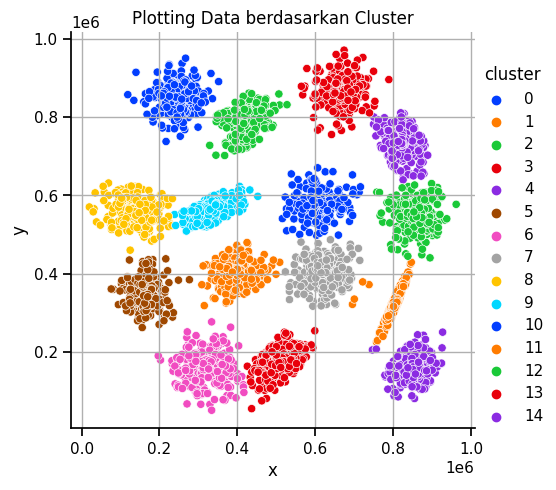

In [ ]:
#Lakukan Plotting terhadap data
import seaborn as sns

#Gunakan library seaborn, lebih mudah.

#START CODE

# Plotting data dengan Seaborn
sns.relplot(x='x', y='y', hue='cluster', data=result, palette='bright')
plt.title('Plotting Data berdasarkan Cluster')
plt.grid(True)
plt.show()

#END CODE